In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
import scipy.integrate
from matplotlib import cm
from scipy import fft
from matplotlib.animation import FuncAnimation, PillowWriter 
import pandas as pd
from sklearn.linear_model import LinearRegression
import time
from scipy.interpolate import RegularGridInterpolator

In [2]:
# define parameters and functions:
alpha = .5
epsilon = .1 #.1 gives things that look like solitons
L_= 2
L = np.pi*L_
V = -1
D_ = 0.6 #very intereting with D=0.5 (which is the same as Ma=1/4) and D = 0.6

In [29]:
Ma_list = [0.18, .2,0.22,  0.24, 0.26]

7
3.141592653589793
Starting solve
(256, 100)  solved static
Time to solve 215.647221326828 s
7
3.141592653589793
Starting solve
(256, 100)  solved static
Time to solve 189.0717911720276 s
7
3.141592653589793
Starting solve
(256, 100)  solved static
Time to solve 121.3615300655365 s
7
3.141592653589793
Starting solve
(256, 100)  solved static
Time to solve 105.96483612060547 s
7
3.141592653589793
Starting solve
(256, 100)  solved static
Time to solve 48.67573404312134 s


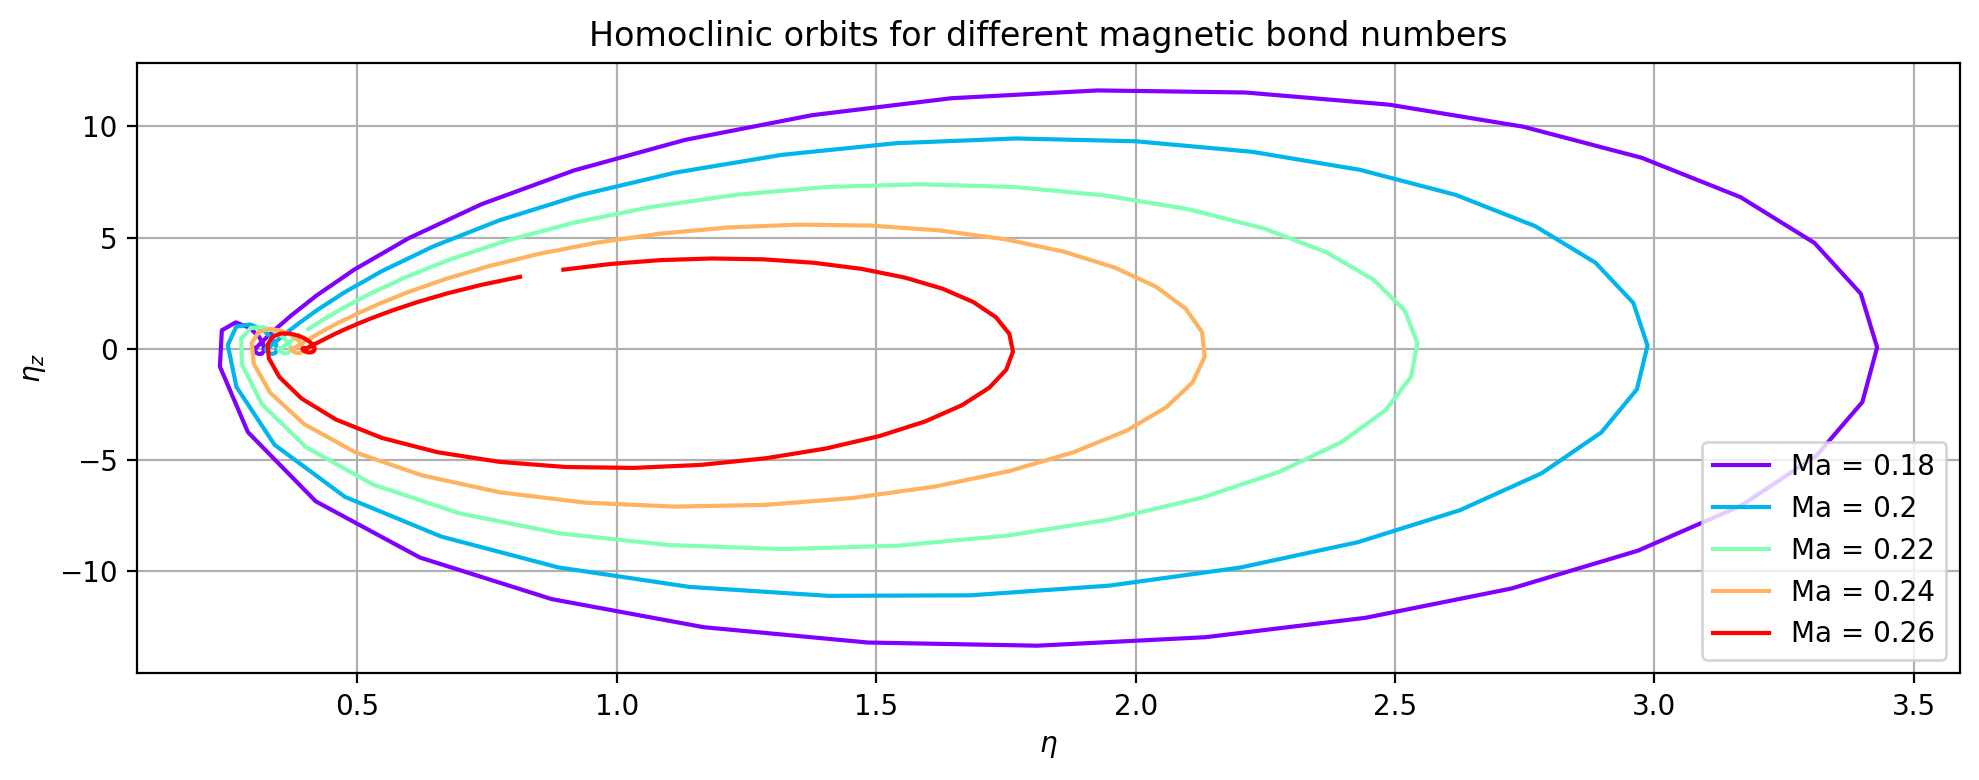

In [33]:
N = 256
Nx = N
n = np.arange(N);
n[int(N/2)+1:] -= N
plt.figure(figsize=(10,4), dpi = 200)
from matplotlib import cm
colors = plt.cm.rainbow(np.linspace(0, 1, len(Ma_list)))
profiles = np.zeros((len(Ma_list), N, 100))
for j,Ma in enumerate(Ma_list):
    D_ = 1-2*Ma
    def RHS(t,eta):
        eta_z = fft.ifft(2*n*np.pi/L*1j*fft.fft(eta))
        eta_zzz = fft.ifft((n*2*np.pi/L*1j)**3*fft.fft(eta))
        deta_dt = -1/3*fft.ifft(2*n*np.pi/L*1j*fft.fft(eta**3*(1 + D_*eta_z + epsilon**2*eta_zzz))).real
        return deta_dt
    K = 1
    T = 150
    k = int(1/np.sqrt(2)/epsilon)
    print(k)
    z = np.linspace(-L/2, L/2, Nx)
    t = np.linspace(0,T, 100)
    t_span = (0,T)
    u0 = (1 + np.sin(z*k)*0.95)*(1-alpha)*K
    print(np.trapz(u0, z))

    print('Starting solve')
    st = time.time()
    result_static = scipy.integrate.solve_ivp(RHS, t_span, u0, 'BDF', atol = 1e-2, t_eval = t)
    u_static = result_static.y
    print(np.shape(u_static), ' solved static')
    et = time.time()
    print(f'Time to solve {et-st} s')
    eta = u_static[:,-1]
    eta_z = fft.ifft(2*n*np.pi/L*1j*fft.fft(eta)).real
    profiles[j, :, :]=u_static
    plt.plot(eta, eta_z, label = f'Ma = {Ma}', color = colors[j])
    plt.legend()
    plt.grid()
plt.title('Homoclinic orbits for different magnetic bond numbers')
plt.xlabel(r'$\eta$')
plt.ylabel(r'$\eta_z$')
plt.tight_layout()
plt.savefig(r'time dependent travelling wave/orbits1.pdf')
plt.show()

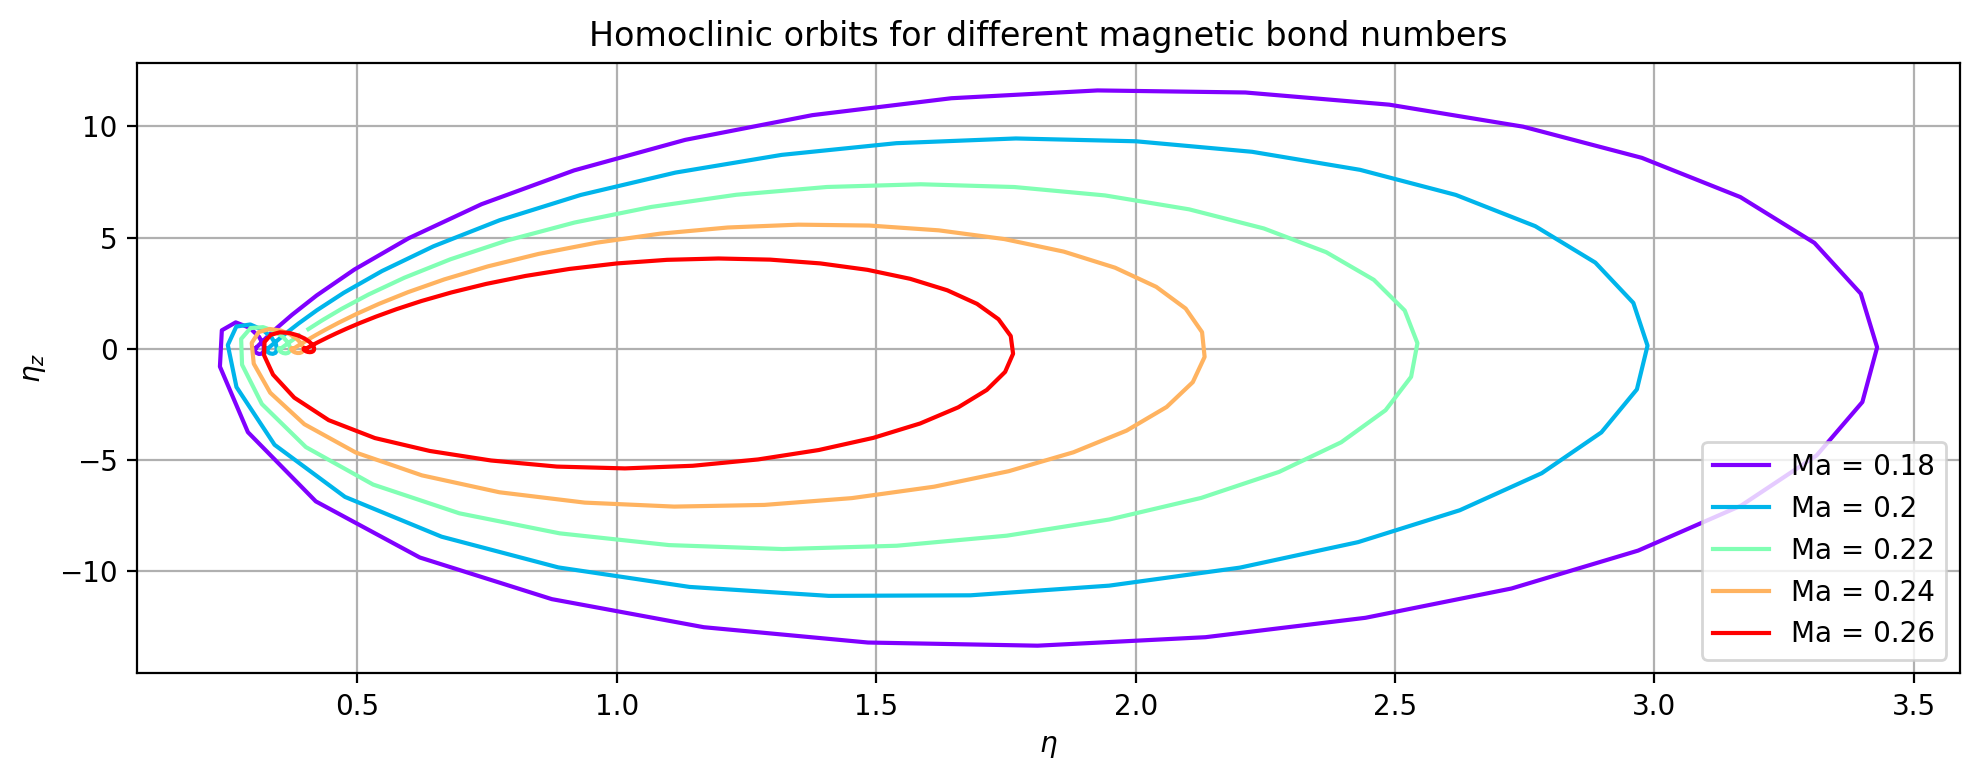

In [35]:
N = 256
Nx = N
n = np.arange(N);
n[int(N/2)+1:] -= N
plt.figure(figsize=(10,4), dpi = 200)
from matplotlib import cm
colors = plt.cm.rainbow(np.linspace(0, 1, len(Ma_list)))

for j,Ma in enumerate(Ma_list):
    D_ = 1-2*Ma
    if j ==4:
        eta = profiles[j,:,95]
    else:
        eta = profiles[j,:,-1]
    eta_z = fft.ifft(2*n*np.pi/L*1j*fft.fft(eta)).real
    plt.plot(eta, eta_z, label = f'Ma = {Ma}', color = colors[j])
    plt.legend()
    plt.grid()
plt.title('Homoclinic orbits for different magnetic bond numbers')
plt.xlabel(r'$\eta$')
plt.ylabel(r'$\eta_z$')
plt.tight_layout()
plt.savefig(r'time dependent travelling wave/orbits1.pdf')
plt.show()

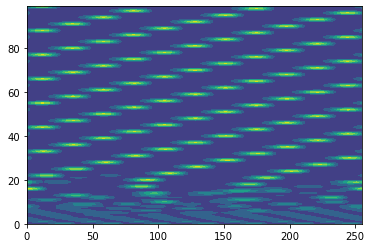

In [32]:
plt.contourf(u_static.T)